In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import korean_language

### 말뭉치 : 데이터분석에 주어진 전체 문서 집합
#### 문서(document) 코퍼스내의 한 단위의 텍스트(예 : 1천개 블로듭합이 말뭉치이면 1개 블로그는 문서)
#### 파싱 : 코퍼스에서 의미있는 단어를 추출하는 작업
#### 토큰 : 컴퓨터가 학습할 수 있는 텍스트 최소 단위로 단어 또는 글자, n-gram를 토큰화함
#### n-gram : n개의 연속된 단어를 하나의 토큰으로 취급(예: 러시아 월드컵) -. 단어수가 매우 증가하므로 빈도수가 일정 정도 이상인 토큰만 활용
#### - 단어 단위로 정보를 표현하는 과정에서 많은 정보를 잃게 됨(예: 정말로 -> 정말, 정말은 -> 정말)  --> 글자 단위로 토큰화하면 정보를 잃는 문제를 피할수 있음
---
## 인코딩 : 토큰데이터를 정수화 벡터로 표시하는 기법으로 원핫인코딩, CountVecorizer, TfidfVectorizer, 단어임베딩으로 벡터화시킴
#### 1)토큰사전 { 어제:0, 러시아:1, 갔다:2, 월드컵:3, 관람:4}  -- 원핫인코딩을 할 경우. 단어가 2000개면 2000차원이며 1999개열은 0, 1개는 1이 되므로 성능과 공간이 증가함
#### 2)BOW(Bag of Word,단어모음) : 한 문장을 하나의 벡터로 만드는 방법 : 한 문장을 단어사전크기의 벡터로 표현하고 그문장에 들어있는 단어의 ㅓㄹ럼만 1, 단어가 없는 컬럼은 모두 0으로 표현
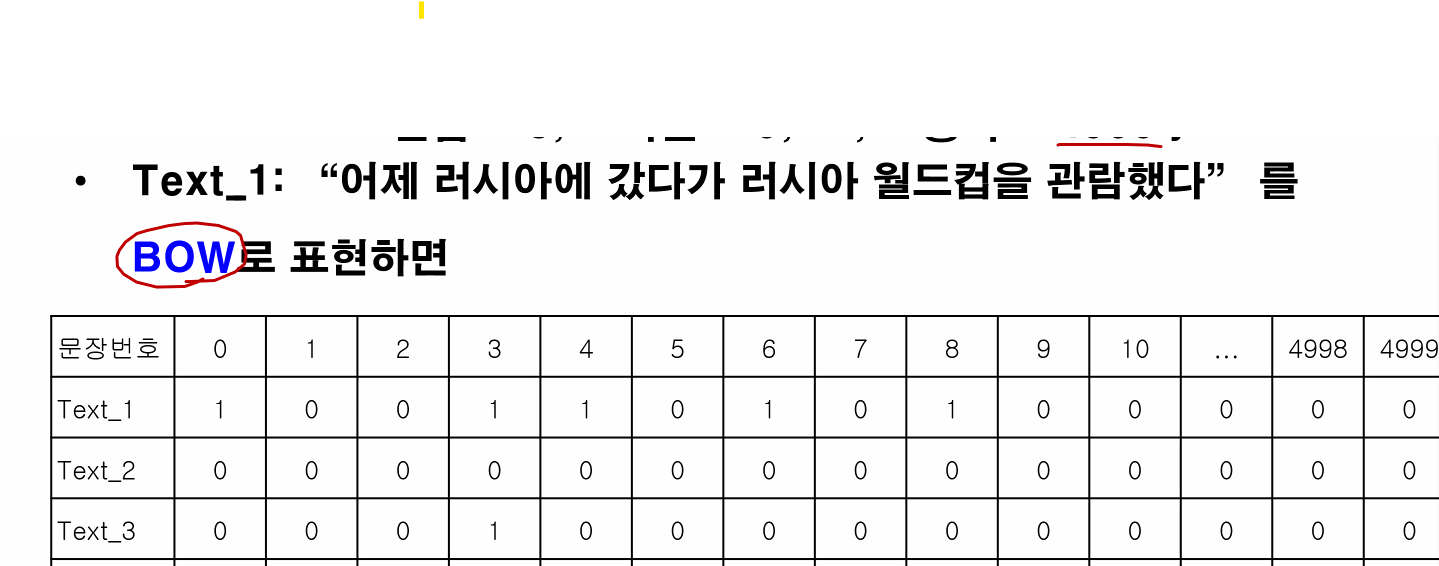
#### 3) 문서단어행렬(document-term) :문서 단위로 어떤 단어들이 있는지 표현, 같은 단어가 여러번 등장하면 1이상의 값을 갖음
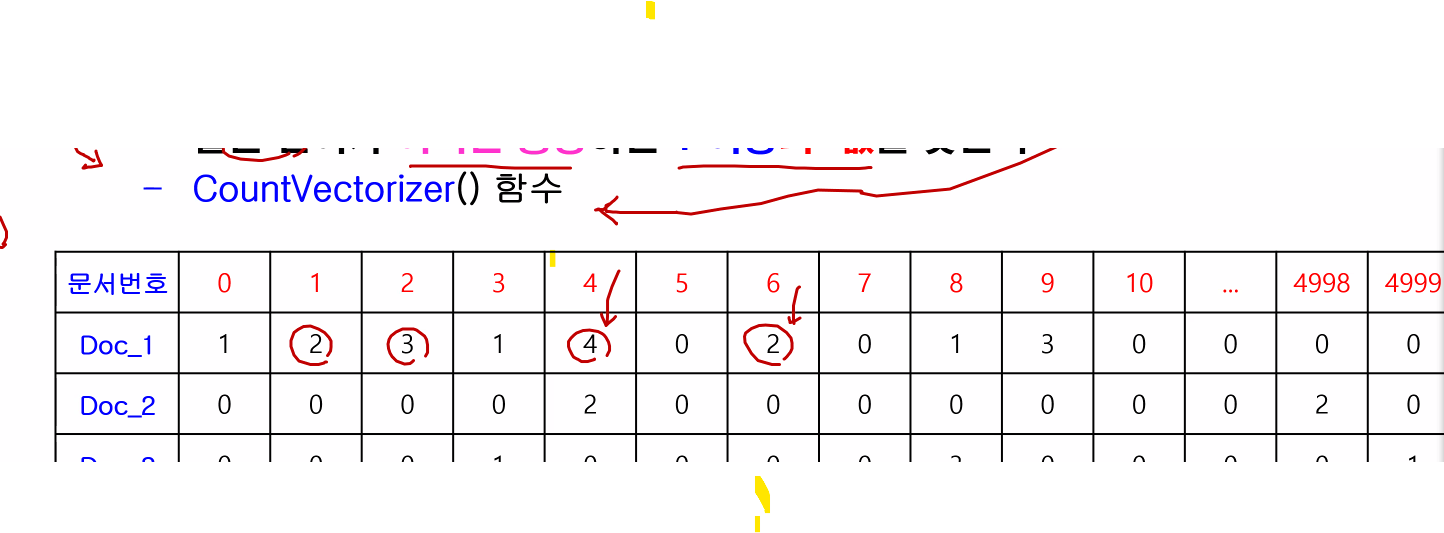
---
### 강사블로그 : https://blog.naver.com/ojunny62/221625568647

In [7]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [8]:
!pip install openpyxl

### Bigkinds 뉴스기사 

In [10]:
news_all = pd.read_excel('./news.xlsx', engine='openpyxl')

C:\python\ml308\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [15]:
news_all.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드', '특성추출',
       '본문', 'URL', '분석제외 여부'],
      dtype='object')

In [16]:
news_all.head(3)

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출,본문,URL,분석제외 여부
0,1.500401e+06,20190228,국제신문,김태경 기자 tgkim@kookje.co.kr,빅딜이냐 스몰딜이냐 ‘영변 핵+α’ 로드맵 도출이 관건,정치>북한,정치>외교,NaN,NaN,NaN,NaN,"김,도널드 트럼프,김의겸,김정은","북미,미국,하노이,서울,싱가포르,북한,리비아","북미,북미 정상회,미국,청와대,북미 정상회담,북한,국무위","빅딜,스몰딜,영변,로드맵,도출,비핵화,수준,상응,조치,막판,양국,협상팀,밀당,1차,...","북미,비핵화,미국,스몰딜,1차,정상회담,김정은,종전선언,연락사무소,하노이,영변,대변...",- 비핵화 수준 상응 조치 놓고\n- 양국 협상팀 막판까지 ‘밀당’\n- 1차 때와...,http://www.kookje.co.kr/news2011/asp/newsbody....,NaN
1,1.200201e+06,20190228,경인일보,조영상,"하노이 도착후 실무대표단 청취 김정은, 북미회담 성공 '잰걸음'",국제>국제일반,정치>북한,NaN,NaN,NaN,NaN,김,"북미,하노이,베트남","조선중앙통신,국무위","하노이,도착,실무대표단,청취,김정은,잰걸음,북미회담,성공,김정은,국무,위원장,시작,...","실무대표단,하노이,김정은,위원장,베트남,북미정상회담,북미회담,정상회담,조선중앙통신,...",김정은 국무위원장이 27일 시작되는 제2차 북미정상회담 성공을 위해 심혈을 기울이고...,http://www.kyeongin.com/main/view.php?key=2019...,NaN
2,1.200101e+06,20190228,경기일보,강해인 기자,트럼프-김정은 '2차 핵담판',정치>북한,정치>청와대,정치>외교,NaN,NaN,NaN,"김,도널드 트럼프,마이크 폼페이오,믹 멀베이니,김영철,리용호,김정은,트럼프","금강산,카펠라,미국,하노이,일본,중국,싱가포르,북한,베트남,러시아","북미,미국,외무상,종전선언ㆍ평화협정,경기일보,노동당,윈-윈,플러스 알파,트위터,한국...","트럼프,김정은,2차,핵담판,북미,정상,단독회담,정상,만찬,역사,창조,도출,북측,폐기...","위원장,영변,김정은,비핵화,합의문,미국,베트남,8개월,단독회담,하노이,금강산관광,체...",북미가 처음으로 정상 간 단독회담과 만찬을 가지며 또다시 새로운 역사 창조에 나섰다...,www.kyeonggi.com/news/articleView.html?idxno=2...,NaN


In [13]:
news_text = news_all['본문']

In [14]:
news_text[:5]

0    - 비핵화 수준 상응 조치 놓고\n- 양국 협상팀 막판까지 ‘밀당’\n- 1차 때와...
1    김정은 국무위원장이 27일 시작되는 제2차 북미정상회담 성공을 위해 심혈을 기울이고...
2    북미가 처음으로 정상 간 단독회담과 만찬을 가지며 또다시 새로운 역사 창조에 나섰다...
3    지난해 9월 남북정상회담 당시 리선권 북한 조국평화통일위원장의 '냉면' 발언으로 정...
4    지자체 민간 교류 활성화 대부분 \n여, 부처간 논의 예산 지원 확대 \n야, 사업...
Name: 본문, dtype: object

In [24]:
len(news_text), news_text.shape

(1543, (1543,))

In [23]:
type(news_text)

pandas.core.series.Series

### 단어문서행렬 방식으로 벡터화 : Countvectorizer - 하나의 문서에 어떤 단어들이 있는지 단어별 빈도수를 정수로 반환
#### 시리즈 데이터를 리스트로 변환 tolist()

In [18]:
cv = CountVectorizer()

In [20]:
dtm = cv.fit_transform(news_text.tolist())

In [34]:
dtm

<1543x16199 sparse matrix of type '<class 'numpy.int64'>'
	with 60645 stored elements in Compressed Sparse Row format>

### cv.get_feature_names_out()결과는 1542행 문장의 모든 단어수이며 16199개 차원이 생김 
#### cv.vocabulary_ : 단어 : 인덱스번호

In [33]:
len(cv.get_feature_names_out())

16199

In [39]:
len(cv.vocabulary_)

16199

In [41]:
cv.vocabulary_

{'비핵화': 7360,
 '수준': 8381,
 '상응': 7656,
 '조치': 12681,
 '놓고': 3926,
 '양국': 9295,
 '협상팀': 15748,
 '막판까지': 5281,
 '밀당': 6020,
 '1차': 209,
 '때와': 5047,
 '달리': 4149,
 '오랜': 9994,
 '시간': 8523,
 '조율': 12644,
 '단계적': 4098,
 '접근': 12173,
 '동의': 4794,
 '예상': 9918,
 '종전선언': 12736,
 '연락사무소': 9703,
 '개설': 1405,
 '조건부': 12565,
 '제재': 12534,
 '완화': 10125,
 '명시': 5596,
 '가능성': 1071,
 '북미회담': 7032,
 '빅딜만': 7392,
 '성공아냐': 8001,
 '김정은': 3223,
 '답방': 4194,
 '회담': 16011,
 '결과와': 1719,
 '연관': 9654,
 '북한': 7082,
 '국무위원장과': 2573,
 '도널드': 4592,
 '트럼프': 14545,
 '미국': 5886,
 '대통령이': 4500,
 '27일': 329,
 '친교': 14174,
 '만찬': 5368,
 '국무위원장이': 2582,
 '시작되는': 8626,
 '제2차': 12450,
 '북미정상회담': 7008,
 '성공을': 8005,
 '위해': 10523,
 '심혈을': 8906,
 '기울이고': 3041,
 '있는': 11487,
 '것으로': 1640,
 '나타났다': 3462,
 '조선중앙통신은': 12609,
 '이날': 10818,
 '26일': 320,
 '하노이에': 15095,
 '도착해': 4653,
 '멜리아': 5566,
 '호텔에서': 15812,
 '실무대표단의': 8792,
 '보고를': 6689,
 '받았다며': 6194,
 '조미': 12588,
 '수뇌회담의': 8297,
 '성공적': 8009,
 '보장을': 6799,
 '북미': 6986,
 '나라

In [30]:
dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
cv.get_feature_names_out()

array(['00', '000원을', '001420', ..., '힘이', '힘입어', '靈山'], dtype=object)

In [26]:
df = pd.DataFrame(dtm.toarray(), columns = cv.get_feature_names_out())

In [31]:
df[:3]

,00,000원을,001420,001550,002100,005690,01,017800,02,025860,...,힌국당,힘겨루기로,힘겨웠던,힘들다고,힘들어,힘들어지는,힘을,힘이,힘입어,靈山
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### df.transpose() : x축과 y축이 바뀜 

In [44]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
00,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
000원을,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
힘들어지는,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
힘을,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
힘이,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
힘입어,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 가장 많이 나타난 단어 찾기 

In [45]:
top_word = []
for i in df.transpose().values:
    top_word.append(sum(i.tolist()))

In [48]:
top_word.index(max(top_word))

398

In [49]:
df.transpose().index[top_word.index(max(top_word))]

'2차'

### 빈도가 높은  단어 2000개만사용
#### CountVectorizer(max_features=2000)

In [52]:
cv2 = CountVectorizer(max_features=2000)

In [56]:
dtm = cv2.fit_transform(news_text.tolist())

In [57]:
df = pd.DataFrame(dtm.toarray(), columns = cv2.get_feature_names_out())

In [58]:
df.shape

(1543, 2000)

#### TF : 어떤 문서에서 단어가 몇번 등장하는지 카운트 - countvectorizer와 동일
#### DF : 그 단어가 등장한 문서의 빈도
#### TF-IDF 전체 문장에서 등장한 특정단어가 특정 문장에서 등장한 단어의 빈도수를 나눠 비율을 구함
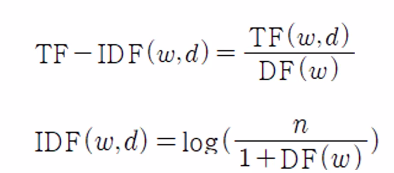

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
tv = TfidfVectorizer(max_features=2000)

In [63]:
dtm = tv.fit_transform(news_text.tolist())

In [64]:
df = pd.DataFrame(dtm.toarray(), columns = cv2.get_feature_names_out())

In [65]:
df.shape

(1543, 2000)

In [66]:
df.head(3)

,00,01,02,0px,10,100주년,100주년을,10시,10일,10일까지,...,회동을,회복,회의론을,회의를,회의에서,효과,효과를,후보지로,후속,힘을
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 스팸 문자 분류

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [68]:
sms = pd.read_csv('./sms_spam.csv', encoding='latin-1')

In [69]:
sms.columns

Index(['type', 'text'], dtype='object')

### tolist : Series Data를 List Data로 변환 

In [70]:
x = sms['text'].tolist()
y = sms['type'].tolist()

In [71]:
x[:4]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...']

In [72]:
y[:4]

['ham', 'ham', 'spam', 'ham']

In [76]:
len(x), len(y)

(5574, 5574)

In [78]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3)
len(train_x), len(test_x), len(train_y), len(test_y)

(3901, 1673, 3901, 1673)

In [79]:
tfidf = TfidfVectorizer(stop_words='english')
x_train_tf = tfidf.fit_transform(train_x)

In [80]:
x_train_tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
x_test_tf = tfidf.transform(test_x)

#### Naive Bayes알고리즘으로 학습 

In [83]:
nb = MultinomialNB()

In [84]:
nb.fit(x_train_tf, train_y)

MultinomialNB()

In [85]:
from sklearn.metrics import classification_report

In [86]:
pred_y = nb.predict(x_test_tf)

In [88]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1455
        spam       1.00      0.84      0.91       218

    accuracy                           0.98      1673
   macro avg       0.99      0.92      0.95      1673
weighted avg       0.98      0.98      0.98      1673



In [89]:
print('score :', nb.score(x_test_tf, test_y))

score : 0.9790794979079498


---
### Naver 영화평점 분석 

In [98]:
!curl -L https://bit.ly/2X9Owwr -o ratings_train.txt
!curl -L https://bit.ly/2WuLd5I -o ratings_test.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   152  100   152    0     0    616      0 --:--:-- --:--:-- --:--:--   622

100    69    0    69    0     0    101      0 --:--:-- --:--:-- --:--:--   101

100   297  100   297    0     0    251      0  0:00:01  0:00:01 --:--:--   251
100   297  100   297    0     0    251      0  0:00:01  0:00:01 --:--:--     0

  4 14.0M    4  704k    0     0   397k      0  0:00:36  0:00:01  0:00:35  397k
 62 14.0M   62 9088k    0     0  3217k      0  0:00:04  0:00:02  0:00:02 7946k
100 14.0M  100 14.0M    0     0  4486k      0  0:00:03  0:00:03 --:--:-- 9487k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 -

### 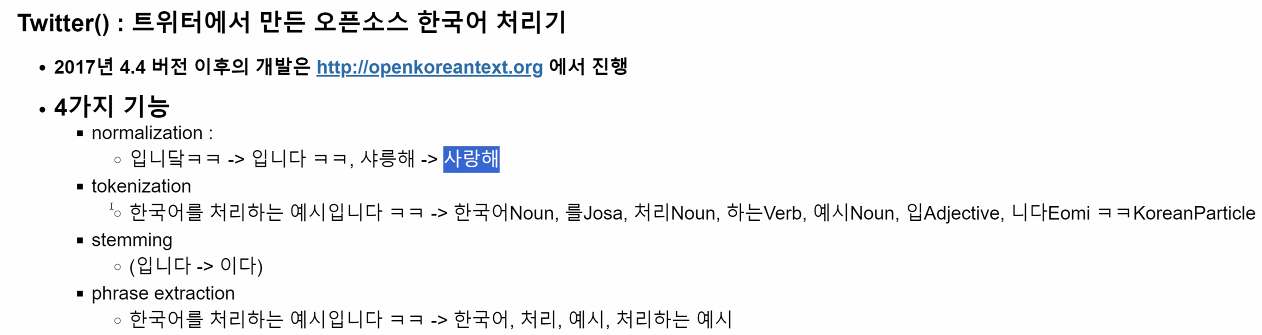
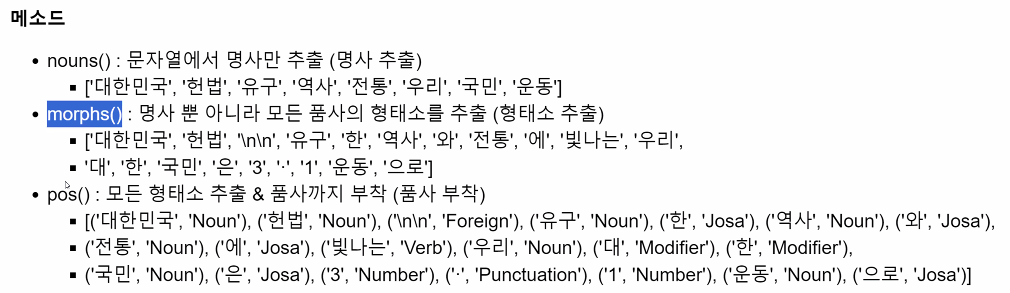

In [105]:
import konlpy
from konlpy.tag import Twitter, Okt
from sklearn.linear_model import LogisticRegression

In [99]:
df_train = pd.read_csv('./ratings_train.txt', delimiter='\t', keep_default_na=False)
df_test = pd.read_csv('./ratings_test.txt', delimiter='\t', keep_default_na=False)

In [96]:
df_train[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [101]:
df_test[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


### 형태소 결과 반환 
#### TfidfVectorizer(tokenizer=twit_token, min_df=5) 데이터를 토큰화해서 넘김, 5개 문서에서 등장한 단어

In [102]:
train_text, train_y = np.array(df_train['document']),np.array(df_train['label'])
test_text, test_y = np.array(df_test['document']),np.array(df_test['label'])

In [106]:
twitter_tag = Twitter()
okt_tag = Okt()
def twit_token(text):
    return okt_tag.morphs(text)

C:\python\ml308\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [107]:
twit_token('뭐야 이 평점들은.... 나쁘진 않지만')

['뭐', '야', '이', '평점', '들', '은', '....', '나쁘진', '않지만']

In [108]:
tfidf = TfidfVectorizer(tokenizer=twit_token, min_df=5)

In [109]:
lr = LogisticRegression()

#### 시간이 오래 걸림

In [111]:
train_x = tfidf.fit_transform(train_text)
test_x = tfidf.transform(test_text)

In [112]:
result = lr.fit(train_x, train_y)

C:\python\ml308\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
